
### О ЛР:

- scikit-learn & decision trees
- Coding decision tree & Categorical features


----

#### Самостоятельная оценка результатов

Для удобства проверки, исходя из набора решенных задач, посчитайте свою максимальную оценку.

**Оценка**: 4.5

***DeadLine - 21.05.2024 23:59***

### Формат сдачи
Задания сдаются через lms. Вы прикрепляете **ССЫЛКУ НА ПУБЛИЧНЫЙ РЕПОЗИТОРИЙ**, где выполнено ваше задание. Иначе задание не проверяется.




### Оценивание и штрафы


Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 5 баллов.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты не могут получить за него больше 0 баллов.

Неэффективная реализация кода может негативно отразиться на оценке.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from matplotlib.colors import Colormap, ListedColormap
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns

sns.set(style="whitegrid")

import warnings

warnings.filterwarnings("ignore")

# 1. Решающие деревья. Визуализация.

В этой части мы рассмотрим два простых двумерных датасета сделанных с помощью `make_moons`, `make_circles` и посмотрим как ведет себя разделяющая поверхность в зависимости от различных гиперпараметров.

In [5]:
from sklearn.datasets import make_moons, make_circles, make_classification

datasets = [
    make_circles(noise=0.2, factor=0.5, random_state=42),
    make_moons(noise=0.2, random_state=42),
    make_classification(
        n_classes=3,
        n_clusters_per_class=1,
        n_features=2,
        class_sep=0.8,
        random_state=3,
        n_redundant=0,
    ),
]

In [6]:
palette = sns.color_palette(n_colors=3)
cmap = ListedColormap(palette)

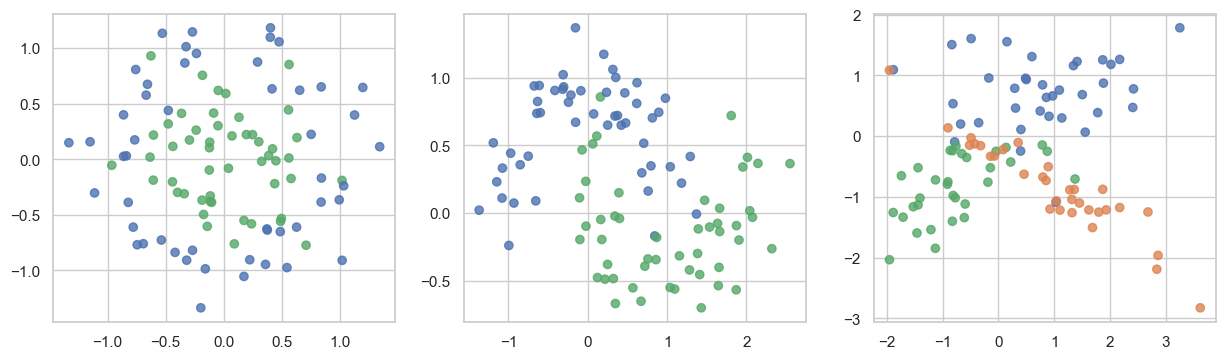

In [7]:
plt.figure(figsize=(15, 4))
for i, (x, y) in enumerate(datasets):
    plt.subplot(1, 3, i + 1)
    plt.scatter(x[:, 0], x[:, 1], c=y, cmap=cmap, alpha=0.8)

__Задание 1. [0.5 балла]__

Для каждого датасета обучите решающее дерево с параметрами по умолчанию, предварительно разбив выборку на обучающую и тестовую. Постройте разделящие поверхности (для этого воспользуйтесь функцией `plot_surface`, пример ниже). Посчитайте accuracy на обучающей и тестовой выборках. Сильно ли деревья переобучились?

In [8]:
def plot_surface(clf, X, y):
    plot_step = 0.01
    palette = sns.color_palette(n_colors=len(np.unique(y)))
    cmap = ListedColormap(palette)
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(
        np.arange(x_min, x_max, plot_step), np.arange(y_min, y_max, plot_step)
    )
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=cmap, alpha=0.3)

    plt.scatter(
        X[:, 0],
        X[:, 1],
        c=y,
        cmap=cmap,
        alpha=0.7,
        edgecolors=np.array(palette)[y],
        linewidths=2,
    )

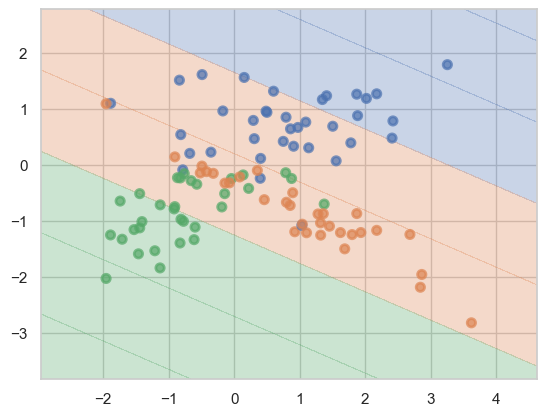

In [9]:
# Пример:
from sklearn.linear_model import LinearRegression

X, y = datasets[2]
lr = LinearRegression().fit(X, y)
plot_surface(lr, X, y)

Dataset 1:
Train accuracy: 1.000
Test accuracy:  0.733
------------------------------
Dataset 2:
Train accuracy: 1.000
Test accuracy:  0.867
------------------------------
Dataset 3:
Train accuracy: 1.000
Test accuracy:  0.833
------------------------------


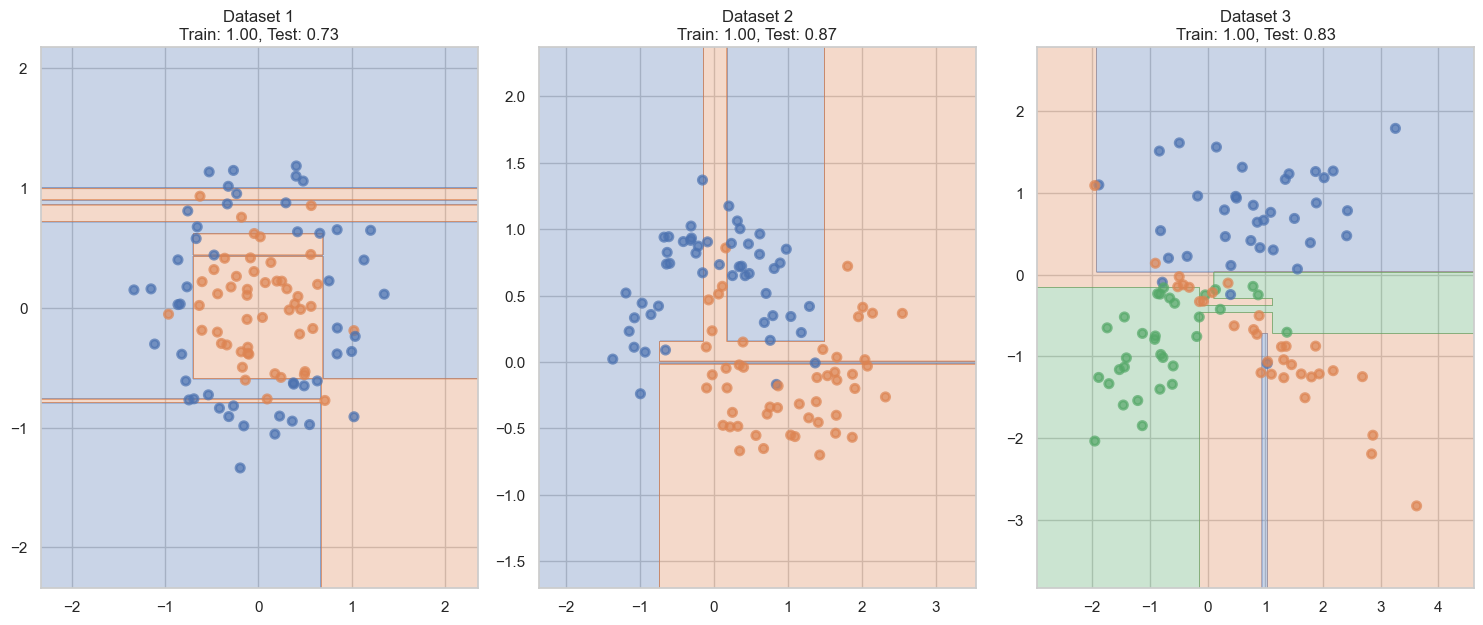

In [11]:
### ╰( ͡☉ ͜ʖ ͡☉ )つ──☆*:・ﾟ   ฅ^•ﻌ•^ฅ   ʕ•ᴥ•ʔ

plt.figure(figsize=(15, 12))

for i, (X, y) in enumerate(datasets):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    clf = DecisionTreeClassifier(random_state=42)
    clf.fit(X_train, y_train)

    train_acc = clf.score(X_train, y_train)
    test_acc = clf.score(X_test, y_test)

    print(f"Dataset {i+1}:")
    print(f"Train accuracy: {train_acc:.3f}")
    print(f"Test accuracy:  {test_acc:.3f}")
    print("-" * 30)

    plt.subplot(2, 3, i+1)
    plot_surface(clf, X, y)
    plt.title(f"Dataset {i+1}\nTrain: {train_acc:.2f}, Test: {test_acc:.2f}")

plt.tight_layout()
plt.show()

__Ответ:__ ╰( ͡☉ ͜ʖ ͡☉ )つ──☆*:・ﾟ   ฅ^•ﻌ•^ฅ   ʕ•ᴥ•ʔ

Да, модель переобучилась, такой вывод я сделал на основе того, что вижу на графике, а именно -

1 - разрывы оранжевой плоскости, тк модель подгоняет разделение под каждую точку

2 - островок синего посреди оранжевого

3 - много полосок разных цветов вне "родного" класса

Ну и ко всему прочему на тестовой у нас модель не "идеальная", а на обучающей - 100%.

__Задание 2. [0.75 балла]__

Попробуйте перебрать несколько параметров для регуляризации (напр. `max_depth`, `min_samples_leaf`). Для каждого набора гиперпараметров постройте разделяющую поверхность, выведите обучающую и тестовую ошибки. Можно делать кросс-валидацию или просто разбиение на трейн и тест, главное делайте каждый раз одинаковое разбиение, чтобы можно было корректно сравнивать (помните же, что итоговое дерево сильно зависит от небольшого изменения обучающей выборки?). Проследите как меняется разделяющая поверхность и обобщающая способность. Почему так происходит, одинаково ли изменение для разных датасетов?

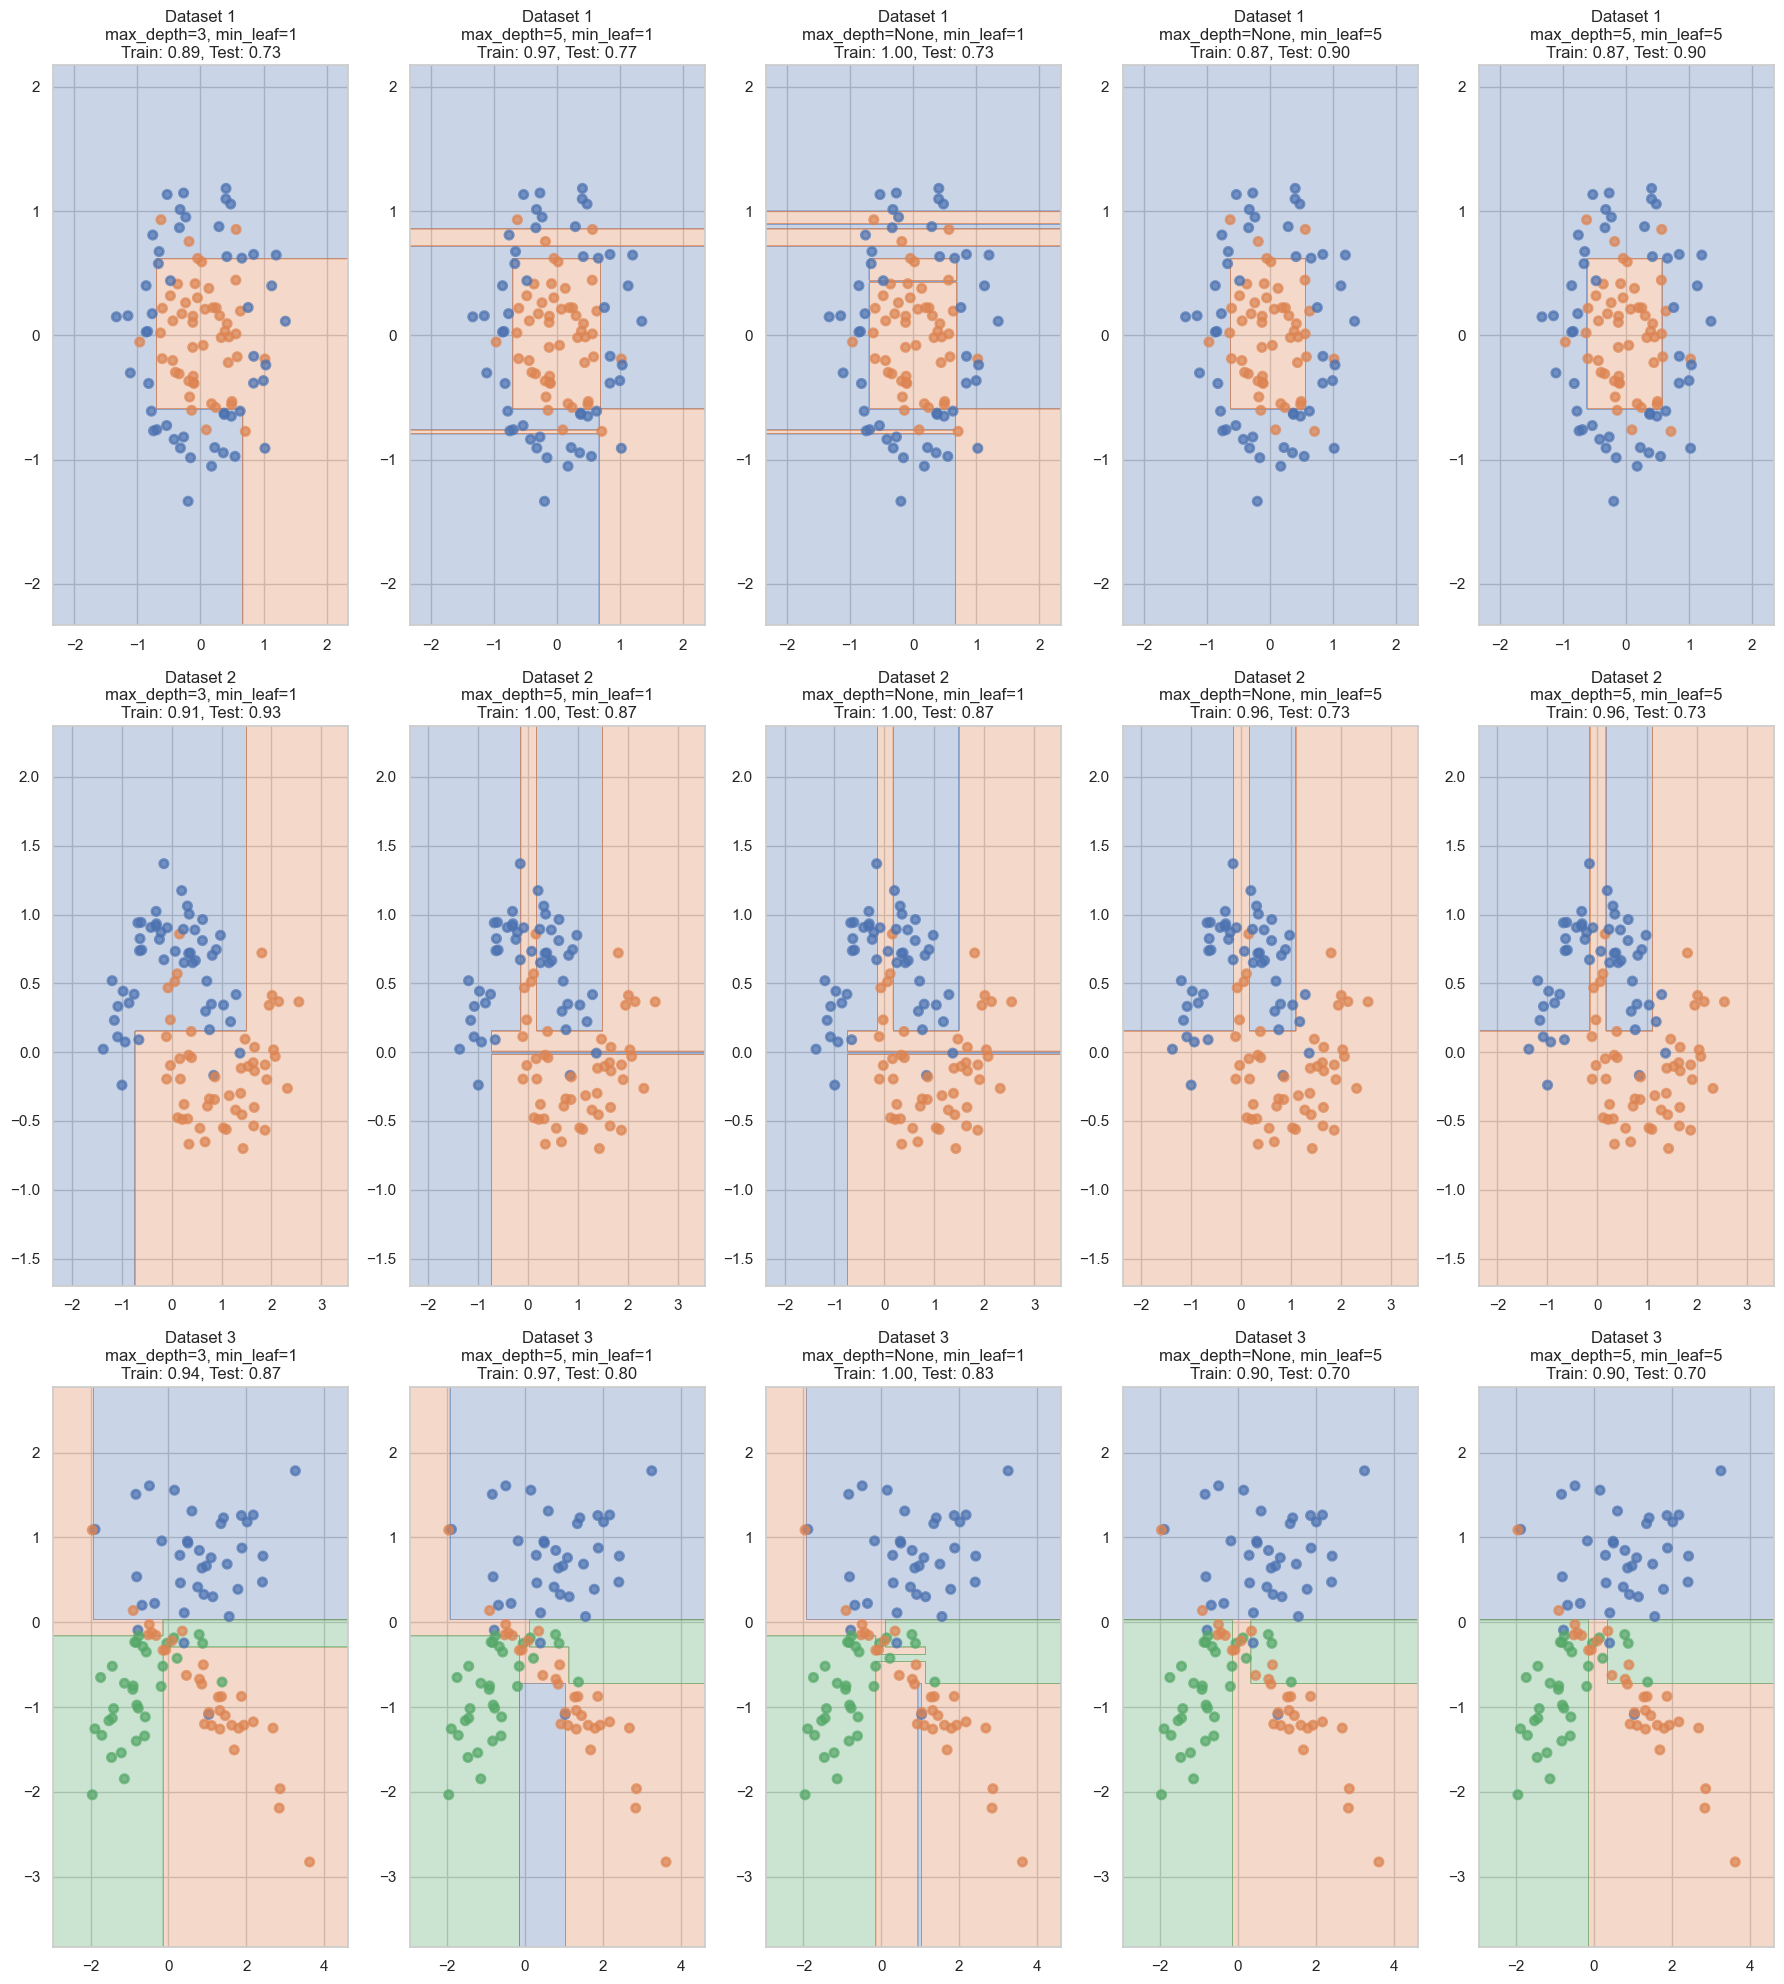

In [12]:
### ╰( ͡☉ ͜ʖ ͡☉ )つ──☆*:・ﾟ   ฅ^•ﻌ•^ฅ   ʕ•ᴥ•ʔ

params = [
    {"max_depth": 3, "min_samples_leaf": 1},
    {"max_depth": 5, "min_samples_leaf": 1},
    {"max_depth": None, "min_samples_leaf": 1},
    {"max_depth": None, "min_samples_leaf": 5},
    {"max_depth": 5, "min_samples_leaf": 5},
]

random_state = 42

plt.figure(figsize=(18, 20))
plot_num = 1

for i, (X, y) in enumerate(datasets):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=random_state)

    for j, p in enumerate(params):
        clf = DecisionTreeClassifier(max_depth=p["max_depth"],
                                     min_samples_leaf=p["min_samples_leaf"],
                                     random_state=random_state)
        clf.fit(X_train, y_train)

        train_acc = clf.score(X_train, y_train)
        test_acc = clf.score(X_test, y_test)

        plt.subplot(len(datasets), len(params), plot_num)
        plot_surface(clf, X, y)
        plt.title(
            f"Dataset {i+1}\nmax_depth={p['max_depth']}, "
            f"min_leaf={p['min_samples_leaf']}\nTrain: {train_acc:.2f}, Test: {test_acc:.2f}"
        )
        plot_num += 1

plt.tight_layout()
plt.show()

__Ответ:__ ╰( ͡☉ ͜ʖ ͡☉ )つ──☆*:・ﾟ   ฅ^•ﻌ•^ฅ   ʕ•ᴥ•ʔ

При подборе различных параметров можно заметить улучшение - границы плоскостей стали без разрывов, на некоторых датасетах и некоторыми параметрами, как будто модель больше не переобучается.

А метрика на обучающей выборке стала не 100%, что как бы гуд.

Изменения - не одинаковы для всех датасетов, так для Первого - 1, 4, 5 варианты - норм; для Второго - 1 вариант - норм; для Третьего - стало лучше, но все еще не то, в целом можно подобрать параметры, чтоб модель не переобучалась.

# 2. Решающие деревья своими руками

В этой части вам нужно реализовать свой класс для обучения решающего дерева в задаче бинарной классификации с возможностью обработки вещественных и категориальных признаков.

__Задание 3. [0.75 балл]__

Реализуйте функцию `find_best_split` из модуля `tree_code.py`

In [22]:
from tree_code import find_best_split
from tree_code import DecisionTree

__Задание 4. [0.25 балла]__

`students.csv` - это преобразованный датасет [User Knowledge](https://archive.ics.uci.edu/ml/datasets/User+Knowledge+Modeling)). Первые пять столбцов содержат признаки каждого объекта, а последний столбец — целевую переменную (класс: 0 или 1). Нужно построить график, который на одном изображении отобразит пять кривых "порог — значение критерия Джини" для всех пяти признаков. Кроме того, стоит отдельно визуализировать scatter-графики "значение признака — класс" для каждого из пяти признаков.

Это нужно и для выявления значимости признаков, и для пороговых значений. Да и глазу приятно

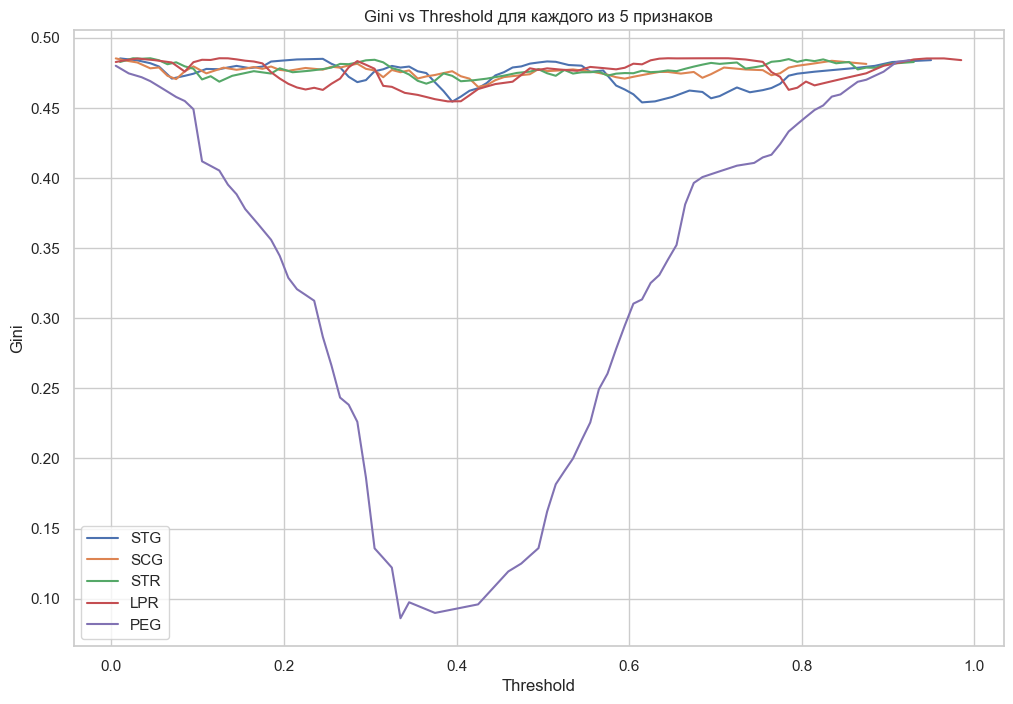

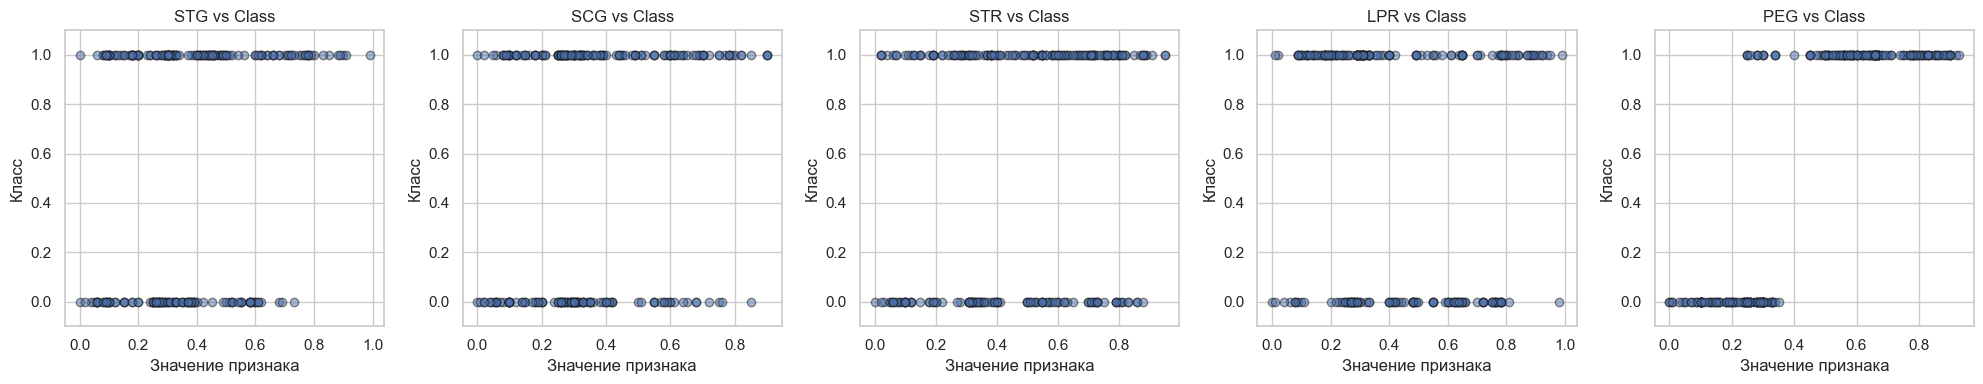

In [16]:
### ╰( ͡☉ ͜ʖ ͡☉ )つ──☆*:・ﾟ   ฅ^•ﻌ•^ฅ   ʕ•ᴥ•ʔ

data = pd.read_csv('students.csv')
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values
feature_names = data.columns[:-1]
feature_names = feature_names.tolist()

plt.figure(figsize=(12, 8))
for i in range(5):
    feature_vector = X[:, i]
    thresholds, ginis, _, _ = find_best_split(feature_vector, y)
    if len(thresholds) > 0:
        plt.plot(thresholds, ginis, label=feature_names[i])

plt.xlabel('Threshold')
plt.ylabel('Gini')
plt.title('Gini vs Threshold для каждого из 5 признаков')
plt.legend()
plt.grid(True)
plt.show()

fig, axes = plt.subplots(1, 5, figsize=(20, 4))
for i in range(5):
    axes[i].scatter(X[:, i], y, alpha=0.5, edgecolors='k')
    axes[i].set_title(f'{feature_names[i]} vs Class')
    axes[i].set_xlabel('Значение признака')
    axes[i].set_ylabel('Класс')
    axes[i].set_ylim(-0.1, 1.1)

plt.tight_layout()
plt.show()

__Задание 5. [0.25 балла]__

На основании кривых критерия Джини, по какому признаку стоит разделить выборку на два поддерева? Совпадает ли этот выбор с визуальной оценкой scatter-графиков? Как бы вы описали вид кривой для "хороших" признаков, по которым выборка делится почти идеально, и чем кривые таких признаков отличаются от кривых признаков, по которым разделение практически невозможно?

**Ответ:** ╰( ͡☉ ͜ʖ ͡☉ )つ──☆*:・ﾟ   ฅ^•ﻌ•^ฅ   ʕ•ᴥ•ʔ

По признаку PEG, тк для его порога критерий gini минимален. И это совпадает с scatter графиками, тк на графике для PEG можно увидеть, что Класс 0 концентрируется при низких значениях признака, а Класс 1 при высоких. Хорошие признаки - те у которых явно выражена "яма" на графике, то есть сильное изменение gini, в то время как остальные признаки трутся около прямой.

__Задание 6. [0.75 балла].__

Разберитесь с уже написанным кодом в классе DecisionTree модуля tree_code.py. Найдите ошибки в реализации метода \_fit_node. Напишите функцию \_predict_node.

 Построение дерева осуществляется согласно базовому жадному алгоритму, предложенному в лекции. Выбор лучшего разбиения необходимо производить по критерию Джини. Критерий останова: все объекты в листе относятся к одному классу или ни по одному признаку нельзя разбить выборку. Ответ в листе: наиболее часто встречающийся класс в листе. Для категориальных признаков выполняется преобразование, описанное в лекции в разделе «Учет категориальных признаков».




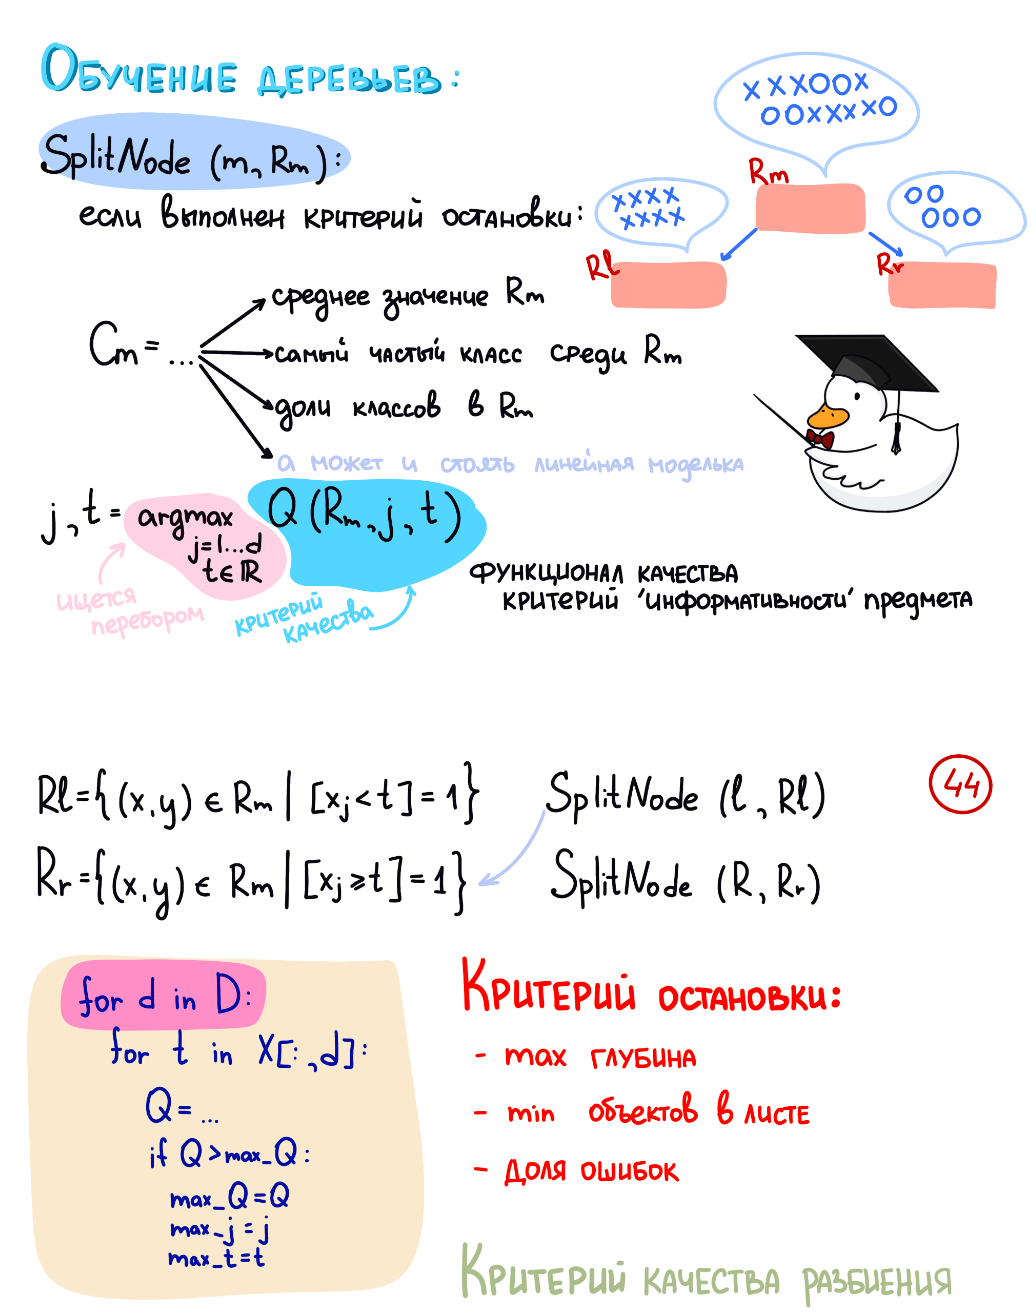

__Задание 7. [0.25 балла]__

Протестируйте свое решающее дерево на датасете [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom). Вам нужно открыть` agaricus-lepiota.data`, прочитать ее с помощью pandas (не забудьте про `agaricus-lepiota.names`), применить к каждому столбцу LabelEncoder (из sklearn), чтобы преобразовать строковые имена категорий в натуральные числа. Первый столбец — это целевая переменная (e — edible, p — poisonous) Мы будем измерять качество с помощью accuracy, так что нам не очень важно, что будет классом 1, а что — классом 0. Обучите решающее дерево на половине случайно выбранных объектов (признаки в датасете категориальные) и сделайте предсказания для оставшейся половины. Вычислите accuracy.

_SPOILER: У вас должно получиться значение accuracy, равное единице (или очень близкое к единице), и не очень глубокое дерево_

In [23]:
### ╰( ͡☉ ͜ʖ ͡☉ )つ──☆*:・ﾟ   ฅ^•ﻌ•^ฅ   ʕ•ᴥ•ʔ

import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

data_mushrooms = pd.read_csv('agaricus-lepiota.data', header=None)

y = data_mushrooms.iloc[:, 0].values
X = data_mushrooms.iloc[:, 1:].values

le_y = LabelEncoder()
y = le_y.fit_transform(y)

X_transformed = np.zeros_like(X, dtype=int)
for i in range(X.shape[1]):
    le = LabelEncoder()
    X_transformed[:, i] = le.fit_transform(X[:, i])

feature_types = ["categorical"] * X_transformed.shape[1]

X_train, X_test, y_train, y_test = train_test_split(
    X_transformed, y, test_size=0.5, random_state=42
)

dt = DecisionTree(feature_types=feature_types)
dt.fit(X_train, y_train)

y_pred = dt.predict(X_test)

acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc)

Accuracy: 1.0


Как и надо было, accuracy = 1. Ура!

__Задание 8. [1 балл]__

Загрузите следующие наборы данных, предварительно ознакомившись с описанием признаков и целевой переменной в каждом из них (она записаны в Data Folder, в файле *.names):
* [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom) (загрузили в предыдущем пункте, классы записаны в нулевом столбце)
* [tic-tac-toe](https://archive.ics.uci.edu/ml/datasets/Tic-Tac-Toe+Endgame) (классы записаны в последнем столбце, датасет лежит на гитхабе вместе с заданием)
* [cars](https://archive.ics.uci.edu/ml/datasets/Car+Evaluation) (классы записаны в последнем столбце, считаем что unacc, acc — это класс 0, good, vgood — класс 1)
* [nursery](https://archive.ics.uci.edu/ml/datasets/Nursery) (классы записаны в последнем столбце, считаем, что not_recom и recommend — класс 0, very_recom, priority, spec_prior — класс 1).

**Задача**:

Закодировать категориальные признаки в наборе данных с использованием `LabelEncoder`. Затем, применив `cross_val_score` (cv=10), оценить метрику accuracy для следующих алгоритмов:

1. **DecisionTree**, обрабатывающий все признаки как вещественные.
2. **DecisionTree**, обрабатывающий все признаки как категориальные.
3. **DecisionTree**, обрабатывающий все признаки как вещественные + one-hot encoding всех признаков.
4. **DecisionTreeClassifier** из `sklearn`.

**Инструкция**:
1. Закодировать категориальные признаки с помощью `LabelEncoder`.
2. Оценить accuracy, используя `cross_val_score` (cv=10) и `scoring=make_scorer(accuracy_score)`.
3. Если позволяет память, установить параметр `sparse=False` в `OneHotEncoder`.
4. Результаты сохранить в `pd.DataFrame` (по строкам — наборы данных, по столбцам — алгоритмы).

**Рекомендации**:
- Для вычисления точности используйте `scoring=make_scorer(accuracy_score)` из `sklearn.metrics`.

In [31]:
### ╰( ͡☉ ͜ʖ ͡☉ )つ──☆*:・ﾟ   ฅ^•ﻌ•^ฅ   ʕ•ᴥ•ʔ

from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score, make_scorer
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

class DecisionTreeWrapper(BaseEstimator, ClassifierMixin):
    def __init__(self, feature_types):
        self.feature_types = feature_types

    def fit(self, X, y):
        self.estim = DecisionTree(feature_types=self.feature_types)
        X = X.astype(int).to_numpy() if isinstance(X, pd.DataFrame) else X
        y = y.astype(int).to_numpy() if isinstance(y, (pd.Series, pd.DataFrame)) else y
        self.estim.fit(X, y)
        self.classes_ = np.unique(y)
        return self

    def predict(self, X):
        X = X.astype(int).to_numpy() if isinstance(X, pd.DataFrame) else X
        return self.estim.predict(X)

Чтобы размапить

In [32]:
def map_cars_target(y_original):
    # "unacc", "acc" -> 0; "good", "vgood" -> 1
    mapping = {"unacc": 0, "acc": 0, "good": 1, "vgood": 1}
    return np.array([mapping[val] for val in y_original])

def map_nursery_target(y_original):
    # "not_recom", "recommend" -> 0; "very_recom", "priority", "spec_prior" -> 1
    mapping = {
        "not_recom": 0,
        "recommend": 0,
        "very_recom": 1,
        "priority": 1,
        "spec_prior": 1
    }
    return np.array([mapping[val] for val in y_original])

Подготовка датасетов

In [33]:
# mushrooms
data_mushrooms = pd.read_csv('agaricus-lepiota.data', header=None)
data_mushrooms.columns = ['class'] + [f'feat_{i}' for i in range(1, data_mushrooms.shape[1])]
# e/p -> 0/1
data_mushrooms.loc[data_mushrooms['class'] == 'e', 'class'] = 0
data_mushrooms.loc[data_mushrooms['class'] == 'p', 'class'] = 1

# Кодируем все признаки LabelEncoder-ом
for col in data_mushrooms.columns[1:]:
    le = LabelEncoder()
    data_mushrooms[col] = le.fit_transform(data_mushrooms[col])
X_mush = data_mushrooms.iloc[:, 1:]
y_mush = data_mushrooms.iloc[:, 0].astype(int)

In [34]:
# tic-tac-toe
data_tic_tac = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/tic-tac-toe/tic-tac-toe.data', header=None)
data_tic_tac.columns = [f'feat_{i}' for i in range(data_tic_tac.shape[1]-1)] + ['class']
data_tic_tac.loc[data_tic_tac['class'] == 'negative', 'class'] = 0
data_tic_tac.loc[data_tic_tac['class'] == 'positive', 'class'] = 1
for col in data_tic_tac.columns[:-1]:
    le = LabelEncoder()
    data_tic_tac[col] = le.fit_transform(data_tic_tac[col])
X_tic = data_tic_tac.iloc[:, :-1]
y_tic = data_tic_tac.iloc[:, -1].astype(int)

In [35]:
# cars
data_cars = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data', header=None)
data_cars.columns = [f'feat_{i}' for i in range(data_cars.shape[1]-1)] + ['class']
y_cars_orig = data_cars['class'].values
y_cars = map_cars_target(y_cars_orig)
for col in data_cars.columns[:-1]:
    le = LabelEncoder()
    data_cars[col] = le.fit_transform(data_cars[col])
X_cars = data_cars.iloc[:, :-1]

In [36]:
# nursery
data_nursery = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/nursery/nursery.data', header=None)
data_nursery.columns = [f'feat_{i}' for i in range(data_nursery.shape[1]-1)] + ['class']
y_nursery_orig = data_nursery['class'].values
y_nursery = map_nursery_target(y_nursery_orig)
for col in data_nursery.columns[:-1]:
    le = LabelEncoder()
    data_nursery[col] = le.fit_transform(data_nursery[col])
X_nursery = data_nursery.iloc[:, :-1]

In [37]:
datasets = {
    "mushrooms": (X_mush, y_mush),
    "tic-tac-toe": (X_tic, y_tic),
    "cars": (X_cars, y_cars),
    "nursery": (X_nursery, y_nursery)
}

scorer = make_scorer(accuracy_score)
cv = 10

results = pd.DataFrame(index=datasets.keys(), columns=["DT_real", "DT_cat", "DT_real_ohe", "sk_DT"])

# sk_DT из sklearn
for name, (X, y) in datasets.items():
    clf = DecisionTreeClassifier(random_state=42)
    scores = cross_val_score(clf, X.astype(int), y, cv=cv, scoring=scorer)
    results.loc[name, "sk_DT"] = scores.mean()

# DT_real признаки как вещественные
for name, (X, y) in datasets.items():
    dt_real = DecisionTreeWrapper(feature_types=["real"]*X.shape[1])
    scores_real = cross_val_score(dt_real, X, y, cv=cv, scoring=scorer)
    results.loc[name, "DT_real"] = scores_real.mean()

# DT_cat признаки как категориальные
for name, (X, y) in datasets.items():
    dt_cat = DecisionTreeWrapper(feature_types=["categorical"]*X.shape[1])
    scores_cat = cross_val_score(dt_cat, X, y, cv=cv, scoring=scorer)
    results.loc[name, "DT_cat"] = scores_cat.mean()

# DT_real_ohe признаки как вещественные + OHE
for name, (X, y) in datasets.items():
    X_ohe = pd.get_dummies(X.astype(int), sparse=False)
    dt_real_ohe = DecisionTreeWrapper(feature_types=["real"]*X_ohe.shape[1])
    scores_real_ohe = cross_val_score(dt_real_ohe, X_ohe, y, cv=cv, scoring=scorer)
    results.loc[name, "DT_real_ohe"] = scores_real_ohe.mean()

print(results)

              DT_real    DT_cat DT_real_ohe     sk_DT
mushrooms    0.965556  0.982266    0.965556  0.960384
tic-tac-toe  0.770603  0.820614    0.770603  0.771678
cars         0.947332  0.880431    0.947332  0.942707
nursery      0.999691  0.999846    0.999691  0.999691


__Задание 9. [0.5 балла]__

Проанализируйте результаты эксперимента: одинаково ли алгоритмы ранжируются на разных наборах данных? Подумайте, почему так происходит. Обратите внимание на значения признаков в разных наборах данных и определите, присутствует ли в результатах какая-то случайная компонента. Можно ли как-то повлиять на нее и улучшить работу алгоритмов?


Анализирую...

По mushrooms - DT_cat отработал лучше всех, тк там признаки являются разрозненными категориями и логично что категориальный подход будет круче всех

По тик-так - аналогично mushrooms

По cars - лучше всех оказались DT_real и DT_real_ohe - странно, ведь тут тоже разные категории, хотя мб тк категории упорядочились через LE или разбились на бинарные через OHE так, что, алгоритм лучше разделяет признак по числовому порогу, но не уверен.

По nursery - все почти одинаково, значит данные нормально разделяются.

Могу сделать такой вывод - эффективность метода можно определить, прогнав через разные алгоритмы кодирования признаков.

# Как дела?

![title](pmFHVGTRbunRDu63CTt84ZpaZQ0-1920.jpg)

In [ ]:
### ╰( ͡☉ ͜ʖ ͡☉ )つ──☆*:・ﾟ   ฅ^•ﻌ•^ฅ   ʕ•ᴥ•ʔ